# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#print(query_url) #comment to remove api from view

In [5]:
# set up lists to hold reponse info
city_name=[]
lat_list=[]
lng_list=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
count_record=[]
set_num=[]

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {count_record} of {set_num} | {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")

        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record [] of [] | kahului
Processing Record [] of [] | faanui
Processing Record [] of [] | doha
Processing Record [] of [] | mataura
Processing Record [] of [] | calvinia
Processing Record [] of [] | kodiak
Processing Record [] of [] | buta
Processing Record [] of [] | bathsheba
Processing Record [] of [] | dikson
Processing Record [] of [] | castro
Processing Record [] of [] | nishihara
Processing Record [] of [] | ribeira grande
Processing Record [] of [] | la ronge
Processing Record [] of [] | mayo
Processing Record [] of [] | kapaa
Processing Record [] of [] | kamenolomni
Processing Record [] of [] | yerevan
Processing Record [] of [] | pacific grove
Processing Record [] of [] | pryozerne
Processing Record [] of [] | rikitea
City not found. Skipping...
Processing Record [] of [] | hasaki
City not found. Skipping...
Processing Record [] of [] | turriff
Processing Record [] of [] | moose factory
Processing Record [] of

Processing Record [] of [] | bintulu
Processing Record [] of [] | saldanha
Processing Record [] of [] | broome
City not found. Skipping...
Processing Record [] of [] | catazaja
Processing Record [] of [] | le port
Processing Record [] of [] | farah
Processing Record [] of [] | vardo
Processing Record [] of [] | axim
Processing Record [] of [] | hami
City not found. Skipping...
Processing Record [] of [] | rach gia
Processing Record [] of [] | vila franca do campo
Processing Record [] of [] | mula
Processing Record [] of [] | lucea
City not found. Skipping...
Processing Record [] of [] | acajutla
Processing Record [] of [] | dunedin
Processing Record [] of [] | harwich
Processing Record [] of [] | lorengau
City not found. Skipping...
Processing Record [] of [] | seoul
Processing Record [] of [] | thompson
Processing Record [] of [] | kaohsiung
Processing Record [] of [] | saint-augustin
Processing Record [] of [] | kuruman
Processing Record [] of [] | nhulunbuy
Processing Record [] of [

Processing Record [] of [] | hlukhiv
Processing Record [] of [] | pecos
City not found. Skipping...
Processing Record [] of [] | san gabriel
City not found. Skipping...
Processing Record [] of [] | ponta pora
City not found. Skipping...
City not found. Skipping...
Processing Record [] of [] | kurilsk
Processing Record [] of [] | thiers
Processing Record [] of [] | merritt
Processing Record [] of [] | dwarka
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record [] of [] | clyde river
Processing Record [] of [] | sayat
Processing Record [] of [] | hauterive
Processing Record [] of [] | hovd
Processing Record [] of [] | wattegama
Processing Record [] of [] | bonthe
Processing Record [] of [] | brae
Processing Record [] of [] | hervey bay
Processing Record [] of [] | dzaoudzi
Processing Record [] of [] | ketchikan
Processing Record [] of [] | binghamton
Processing Record [] of [] | lubango
Processing Record [] of [] | sorland
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#Weather DF
weather_dict = pd.DataFrame({ 
                "City" : city_name,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date
})
weather_dict.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,28.32,69,40,7.20,US,1628536953
1,Faanui,-16.4833,-151.7500,26.57,70,10,7.45,PF,1628537195
2,Doha,25.2867,51.5333,37.17,71,0,3.60,QA,1628537195
3,Mataura,-46.1927,168.8643,5.27,97,70,2.03,NZ,1628537196
4,Calvinia,-31.4707,19.7760,7.92,49,0,2.14,ZA,1628537196
...,...,...,...,...,...,...,...,...,...
516,Huejuquilla el Alto,22.6000,-103.8667,25.16,48,37,1.13,MX,1628537362
517,Polunochnoye,60.8697,60.4153,11.15,87,100,3.37,RU,1628537363
518,Salym,60.0625,71.4789,15.09,98,100,1.47,RU,1628537363
519,Lamar,33.6668,-95.5836,34.18,58,20,7.72,US,1628537364


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
weather_dict.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,21.776932,16.031434,21.669511,68.496377,51.596014,3.598297,1.628537e+09
std,32.820582,88.670720,8.212404,21.490723,39.858527,2.445337,8.751574e+01
min,-54.800000,-175.200000,2.130000,6.000000,0.000000,0.000000,1.628537e+09
25%,-3.622075,-63.744225,15.037500,57.000000,10.000000,1.790000,1.628537e+09
50%,27.493400,19.025350,22.850000,72.000000,47.000000,3.090000,1.628537e+09
75%,49.751750,88.787725,27.550000,84.000000,96.000000,4.757500,1.628537e+09
max,78.218600,179.316700,42.720000,100.000000,100.000000,15.460000,1.628537e+09


In [28]:
#  Get the indices of cities that have humidity over 100%.

In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [33]:
clean_city=pd.DataFrame
clean_city_data=weather_dict
clean_city_data.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

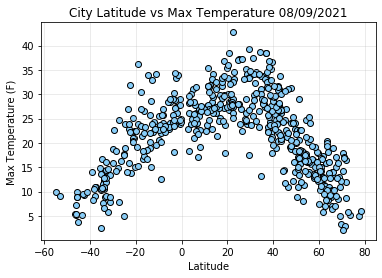

In [47]:
#Scatter plot format and labels
plt.scatter(lat_list, max_temp, color="lightskyblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature 08/09/2021")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Plots/City Lat vs Max Temp.png")
plt.show()

## Latitude vs. Humidity Plot

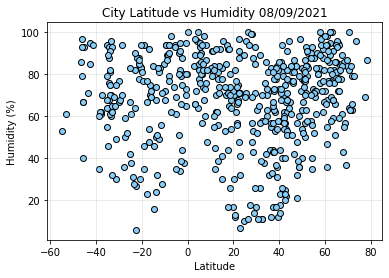

In [51]:
#Scatter plot format and labels
plt.scatter(lat_list, humidity, color="lightskyblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity 08/09/2021")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Plots/City Lat vs Humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

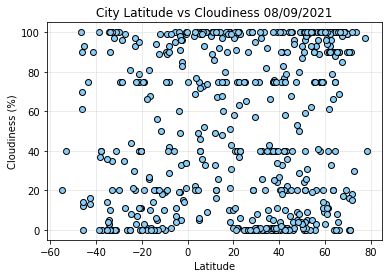

In [53]:
#Scatter plot format and labels
plt.scatter(lat_list, cloudiness, color="lightskyblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness 08/09/2021")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Plots/City Lat vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

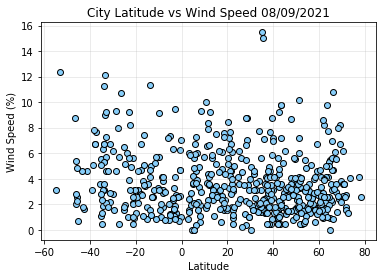

In [54]:
#Scatter plot format and labels
plt.scatter(lat_list, wind_speed, color="lightskyblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.title("City Latitude vs Wind Speed 08/09/2021")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Plots/City Lat vs Wind Speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression